In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [25]:
# Parameter dari augmentation
datagen = ImageDataGenerator(
		rotation_range = 90, # rotasi dengan sudut 90 derajat
		shear_range = 0.2, # rentang pergeseran gambar
		zoom_range = 0.2, # rentang zoom dari gambar
		horizontal_flip = True, # membalikkan gambar secara
		brightness_range = (0.5, 1.5)
  )

In [26]:
#Load gambar
img = load_img('/content/drive/MyDrive/image/kucing.jpeg')
# Converting inputan gambar ke matrix array pixel dari gambar
x = img_to_array(img)
print(x.shape)
# Reshaping the input image
x = x.reshape((1, ) + x.shape)
print(x.shape)

(602, 900, 3)
(1, 602, 900, 3)


In [27]:
# Membuat folder 'preview' jika tidak tersedia
if not os.path.exists('preview'):
    os.makedirs('preview')

# Generating and saving 5 augmented samples
# using the above defined parameters.
i = 0
for batch in datagen.flow(x, batch_size = 1,
						save_to_dir ='preview',
						save_prefix ='image', save_format ='jpeg'):
	i += 1
	if i > 5:
		break

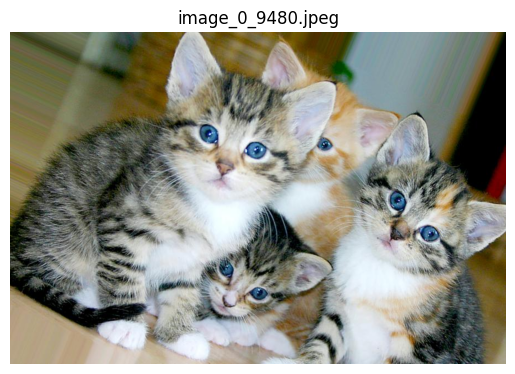

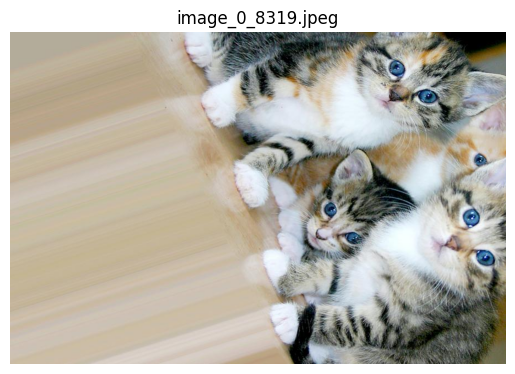

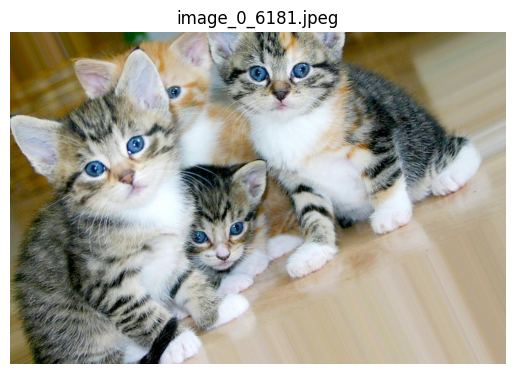

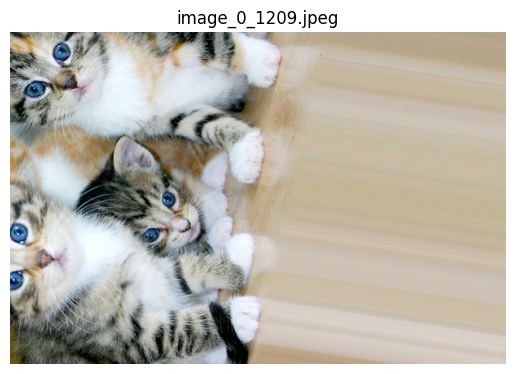

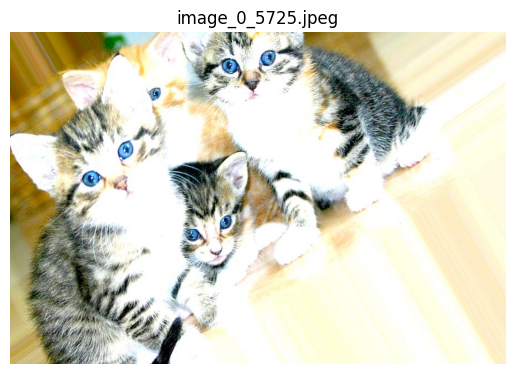

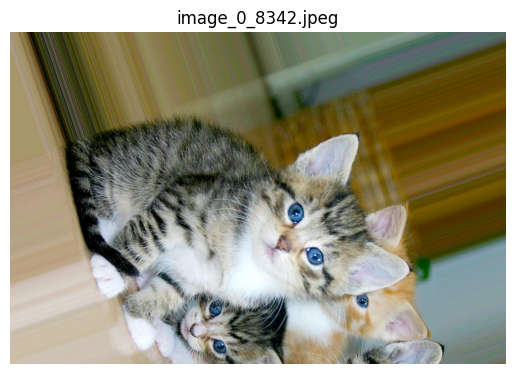

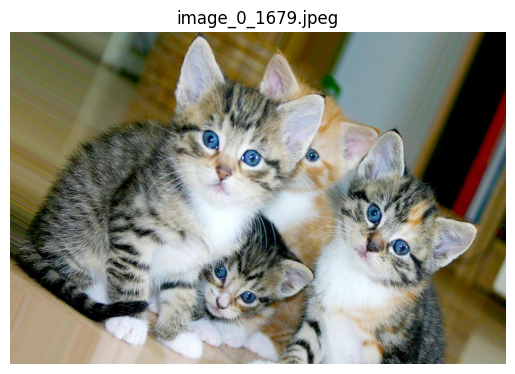

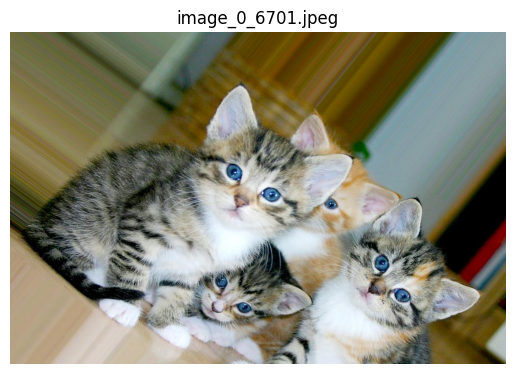

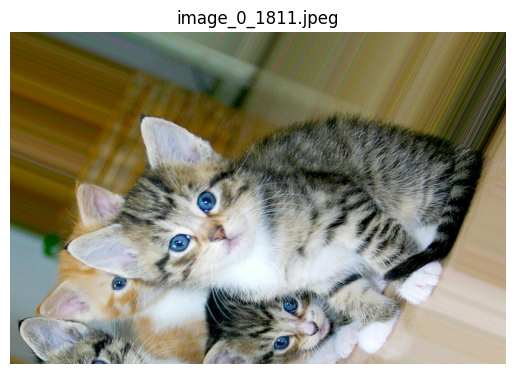

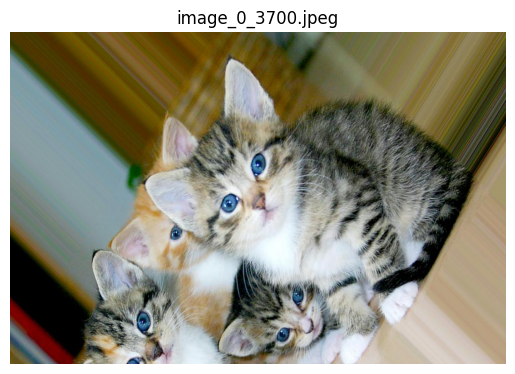

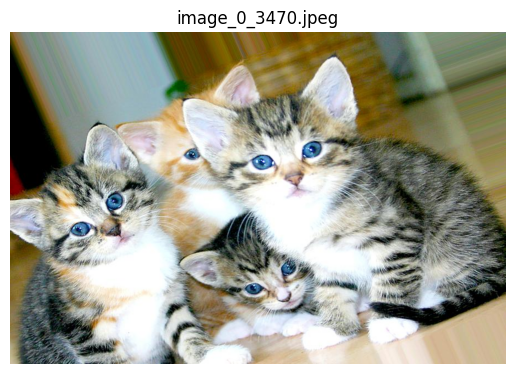

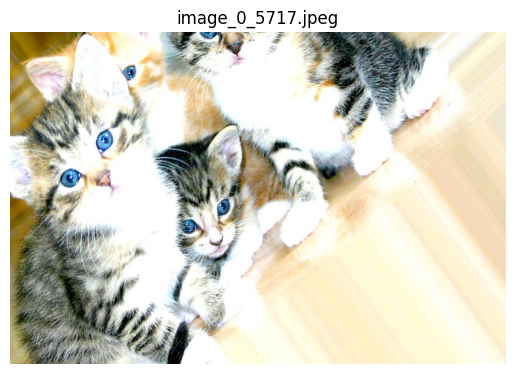

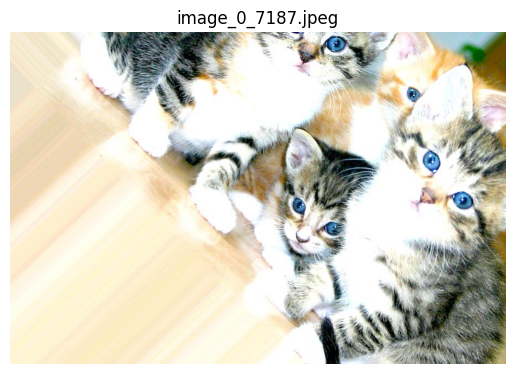

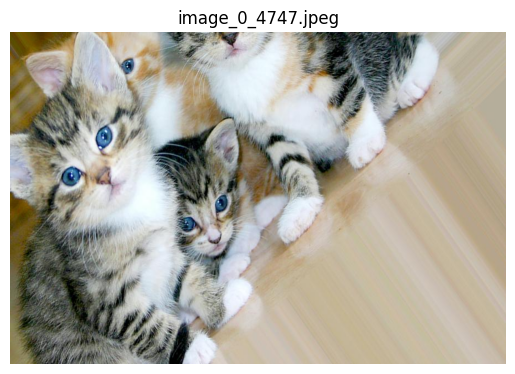

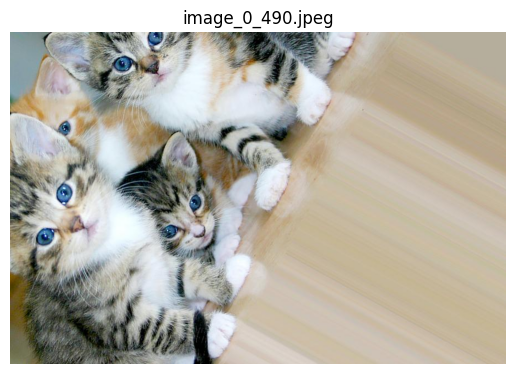

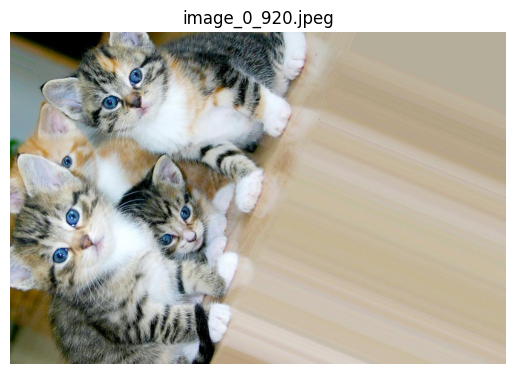

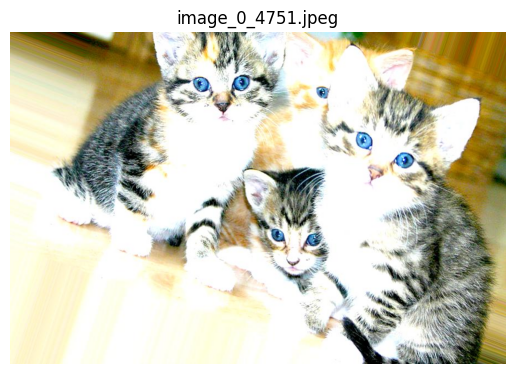

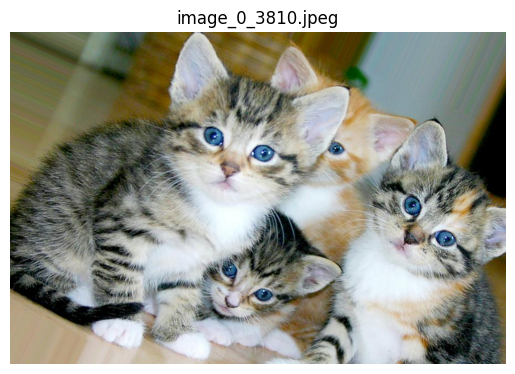

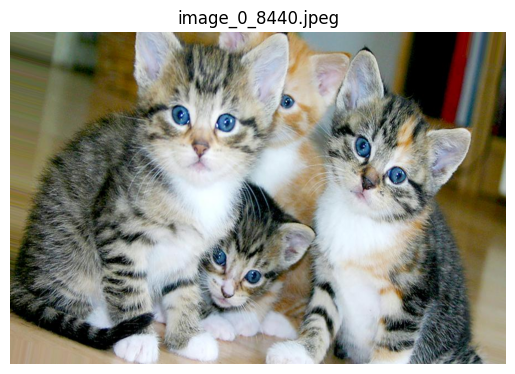

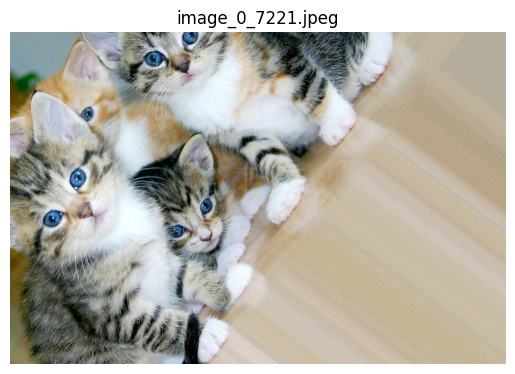

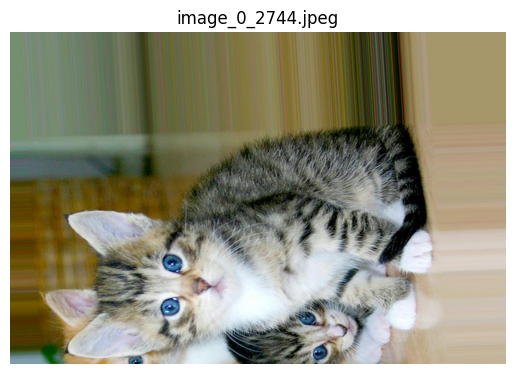

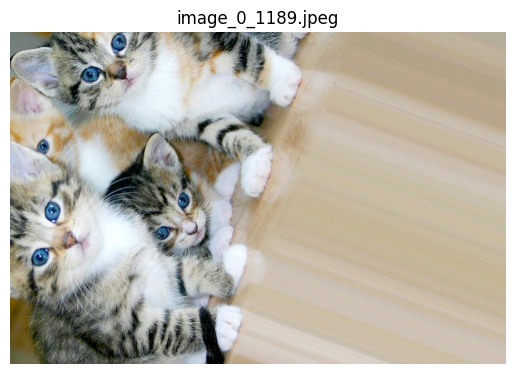

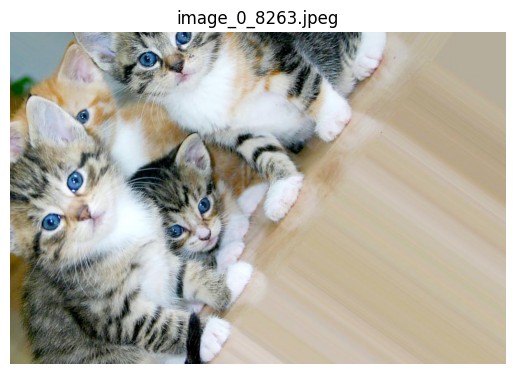

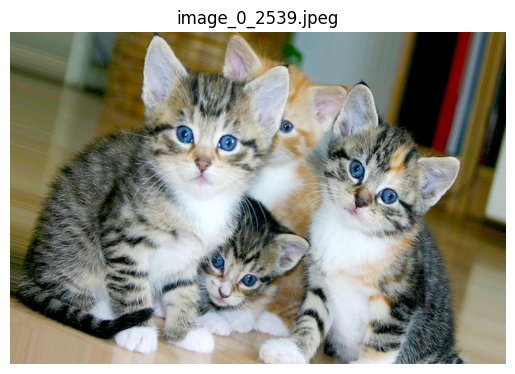

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan semua gambar di folder preview
for filename in os.listdir('preview'):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Periksa ekstensi gambar
        image_path = os.path.join('preview', filename)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')  # Sembunyikan sumbu
        plt.show()
